In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
new_df = df[['Survived','Pclass','Sex','Age','Fare']]

In [6]:
new_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


EDA

<Axes: xlabel='Survived'>

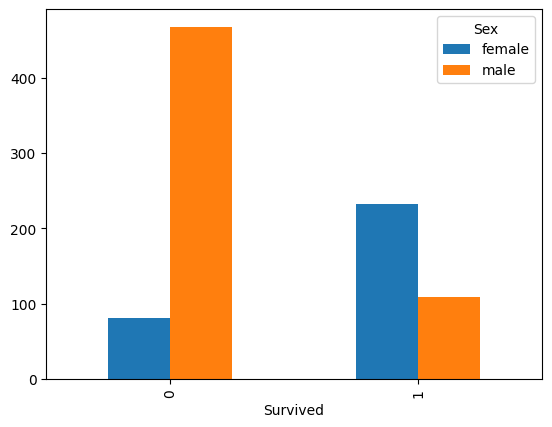

In [20]:
pd.crosstab(new_df['Survived'], new_df['Sex']).plot(kind='bar')

From above graph we can see that more female had survived during crash

<Axes: xlabel='Survived'>

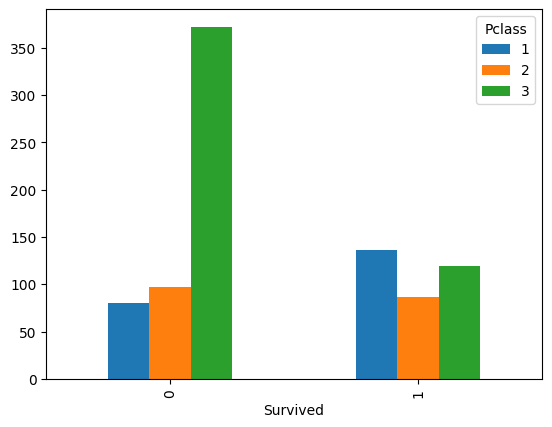

In [24]:
pd.crosstab(new_df['Survived'], new_df['Pclass']).plot(kind='bar')

As we can see people travelling from 3rd class are more likely to die, thats why money is important in Life.

In [25]:
new_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [29]:
# Label Encoding: converting string values into number 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
new_df['Sex'] = encoder.fit_transform(new_df['Sex'])
new_df.head()

C:\Users\Vishnu Sah\AppData\Local\Temp\ipykernel_5508\4126952939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sex'] = encoder.fit_transform(new_df['Sex'])


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [34]:
X = new_df.iloc[:,1:]
y = new_df['Survived']

training data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
model_decision = DecisionTreeClassifier()

In [41]:
model_decision.fit(X_train,y_train)

DecisionTreeClassifier()

model prediction

In [67]:
model_decision.predict([[2,1,23.0,13.000]])

C:\Users\Vishnu Sah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [65]:
X_train.head(3)

,Pclass,Sex,Age,Fare
331,1,1,45.5,28.500
733,2,1,23.0,13.000
382,3,1,32.0,7.925


In [66]:
y_train[:3]

331    0
733    0
382    0
Name: Survived, dtype: int64

model accuracy

In [49]:
model_decision.score(X_test, y_test)

0.7653631284916201

pySpark questions

In [5]:
data = {'name':['raju','shyam','baburoa'],
        'values':['mumbai,pune','bangalore,hyderabad','delhi,gurgaon']
}

import pandas as pd 
df = pd.DataFrame(data)


In [13]:
df

,name,values
0,raju,"mumbai,pune"
1,shyam,"bangalore,hyderabad"
2,baburoa,"delhi,gurgaon"


In [18]:
df['values'] = df['values'].str.split(',')
df

,name,values
0,raju,"[mumbai, pune]"
1,shyam,"[bangalore, hyderabad]"
2,baburoa,"[delhi, gurgaon]"


In [20]:
df.explode('values')

,name,values
0,raju,mumbai
0,raju,pune
1,shyam,bangalore
1,shyam,hyderabad
2,baburoa,delhi
2,baburoa,gurgaon
